**Medical Imaging**

Since the first x-ray in 1895, medical imaging technology has advanced clinical care and opened up new fields of scientific investigation. The amount of imaging data is exploding: by 2020, there is estimated to be more than three and a half billion terabytes of it in the U.S. alone. This has created amazing opportunities for analysis: measuring organ shape and size; creating detailed reconstructions of anatomy; analyzing tissue composition; predicting pathology, and so much more. 

**Objectives:**

Exploration

Mask and filters

Measurement

Image comparison


**Libraries:**

ImageIO

numpy 

scipy

matplotlib




In [ ]:
import imageio
from skimage import data
import matplotlib.pyplot as plt
import scipy.ndimage as ndi
import numpy as np

In [ ]:
im=imageio.imread("/content/MONO2-16-ankle_v1.dcm") #replace your location
#type of image 
print(type(im))

<class 'imageio.core.util.Array'>


The actual content of the image depends on the instrument used: photographs measure visible light, x-ray and CT measure radiation absorbance, and MRI scanners measure magnetic fields.ImageIO reads in data as Image objects. These are standard NumPy arrays with a dictionary of metadata.

Metadata can be quite rich in medical images and can include:

**Patient demographics:** name, age, sex, clinical information

**Acquisition information:** image shape, sampling rates, data type, modality (such as X-Ray, CT or MRI)

In [ ]:
#Read meta information
im.meta

Dict([('TransferSyntaxUID', '1.2.840.10008.1.2'),
      ('SOPClassUID', '1.2.840.10008.5.1.4.1.1.7'),
      ('SOPInstanceUID', '1.2.840.113619.2.1.2411.1031152382.365.1.736169244'),
      ('StudyDate', '1993.04.30'),
      ('SeriesDate', '1993.04.30'),
      ('ContentDate', '1993.04.30'),
      ('StudyTime', '11:27:24'),
      ('SeriesTime', '11:27:24'),
      ('ContentTime', '11:27:24'),
      ('Modality', 'CT'),
      ('Manufacturer', 'GE MEDICAL SYSTEMS'),
      ('InstitutionName', 'JFK IMAGING CENTER'),
      ('StudyDescription', 'RT ANKLE'),
      ('PatientName', 'Rubo DEMO'),
      ('PatientID', '11234'),
      ('PatientSex', 'Male'),
      ('PatientAge', '47'),
      ('StudyInstanceUID', '1.2.840.113619.2.1.1.322987881.621.736170080.681'),
      ('SeriesInstanceUID',
       '1.2.840.113619.2.1.2411.1031152382.365.736169244'),
      ('SeriesNumber', 365),
      ('InstanceNumber', 1),
      ('SamplesPerPixel', 1),
      ('Rows', 512),
      ('Columns', 512),
      ('BitsAllocated'

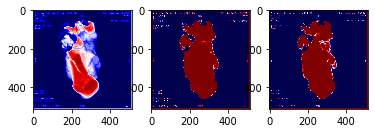

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3)
axes[0].imshow(im, cmap='seismic')
axes[1].imshow(im2, cmap='seismic',vmin=-200,vmax=200)
axes[2].imshow(im2, cmap='seismic',vmin=-100,vmax=400)
plt.show()

**N-dimensional images**


N-dimensional images can be considered as stack of lower dimension images.We will use numpy for stacking the multiple images and create higher dimension images.
 

In [ ]:
# Read in each 2D image
im1 = imageio.imread('/content/MONO2-16-ankle_v1.dcm')
im2 = imageio.imread('/content/MONO2-16-ankle_v1.dcm')
im3 = imageio.imread('/content/MONO2-16-ankle_v1.dcm')

In [ ]:
vol=np.stack((im1,im2,im3),axis=0)

In [ ]:
print("Shape of volume : ",vol.shape)

Shape of volume :  (3, 512, 512)


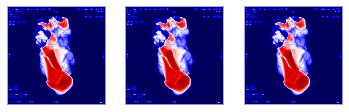

In [ ]:
# Plot the images on a subplots array 
fig, axes = plt.subplots(nrows=1,ncols=3)

# Loop through subplots and draw image
for ii in range(3):
    im = vol[ii]
    axes[ii].imshow(im, cmap='seismic')
    axes[ii].axis('off')
    
# Render the figure
plt.show()

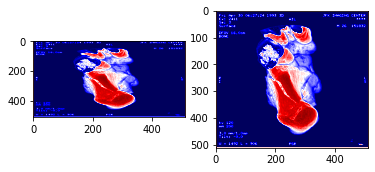

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2)
axes[0].imshow(im1, cmap='seismic',aspect=0.5)
axes[1].imshow(im2, cmap='seismic', aspect=0.9)
plt.show()

**Intensity values**


There 2 concepts:

1.pixels: 2D picture elements

2.voxels: 3D volume elements

Two properties:
Intensity and location


**Data types and image size**

Array's data type controls range of possible intensities.




In [ ]:
face=imageio.imread("/content/MONO2-16-ankle_v1.dcm")

In [ ]:
print(face.dtype)
print(face.size)

int64=face.astype(np.uint64)
print(int64.dtype)
print(int64.size)

int16
262144
uint64
262144


**Histograms:**
Count number of pixels at each intensities.
Implemented in scipy.ndimage .Higher demensional arrays.Advanced techniques and functionality in skimage.


Histograms display the distribution of values in your image by binning each element by its intensity then measuring the size of each bin.

The area under a histogram is called the cumulative distribution function. It measures the frequency with which a given range of pixel intensities occurs.

(256,)


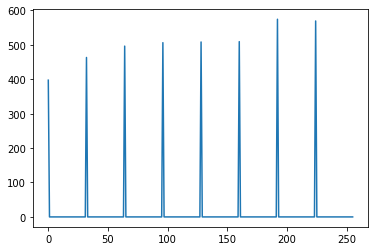

In [ ]:
hist=ndi.histogram(face,min=0,max=255,bins=256)
print(hist.shape)
plt.plot(hist)
plt.show()

**Equalization**

Distribution often skewed towards low intensities.(Background values)

Equalization redistribute values to optimize full intensity range.

Cumumlative distribution function (CDF) shows proportion of pixels in range.



In [ ]:
hist.sum()

4022

In [ ]:
hist.cumsum()

array([ 397,  397,  397,  397,  397,  397,  397,  397,  397,  397,  397,
        397,  397,  397,  397,  397,  397,  397,  397,  397,  397,  397,
        397,  397,  397,  397,  397,  397,  397,  397,  397,  397,  860,
        860,  860,  860,  860,  860,  860,  860,  860,  860,  860,  860,
        860,  860,  860,  860,  860,  860,  860,  860,  860,  860,  860,
        860,  860,  860,  860,  860,  860,  860,  860,  860, 1356, 1356,
       1356, 1356, 1356, 1356, 1356, 1356, 1356, 1356, 1356, 1356, 1356,
       1356, 1356, 1356, 1356, 1356, 1356, 1356, 1356, 1356, 1356, 1356,
       1356, 1356, 1356, 1356, 1356, 1356, 1356, 1356, 1862, 1862, 1862,
       1862, 1862, 1862, 1862, 1862, 1862, 1862, 1862, 1862, 1862, 1862,
       1862, 1862, 1862, 1862, 1862, 1862, 1862, 1862, 1862, 1862, 1862,
       1862, 1862, 1862, 1862, 1862, 1862, 1862, 2370, 2370, 2370, 2370,
       2370, 2370, 2370, 2370, 2370, 2370, 2370, 2370, 2370, 2370, 2370,
       2370, 2370, 2370, 2370, 2370, 2370, 2370, 23

In [ ]:
cdf=hist.cumsum()/hist.sum()

In [ ]:
cdf.shape

(256,)

In [ ]:
face.shape

(512, 512)

**Mask**

Masks are the primary method for removing or selecting specific parts of an image. 

They are binary arrays that indicate whether a value should be included in an analysis. Typically, masks are created by applying one or more logical operations to an image.




In [ ]:
mat=np.array([[1,2,3],[4,5,6],[7,8,9]])

In [ ]:
print(type(mat))
print(mat.shape)

<class 'numpy.ndarray'>
(3, 3)


In [ ]:
mat>5

array([[False, False, False],
       [False, False,  True],
       [ True,  True,  True]])

Although masks are binary, they can be applied to images to filter out pixels where the mask is False.

Imperfect masks can be tuned through the addition and subtraction of pixels. SciPy includes several useful methods for accomplishing these ends. These include:

binary_dilation: Add pixels along edges

binary_erosion: Remove pixels along edges

binary_opening: Erode then dilate, "opening" areas near edges

binary_closing: Dilate then erode, "filling in" holes

NumPy's where() function is a flexible way of applying masks. It takes three arguments:


In [ ]:
im_bone=np.where(im>64,1,0)
im_eros=ndi.binary_erosion(im_bone,iterations=5)
im_dia=ndi.binary_dilation(im_bone,iterations=5)

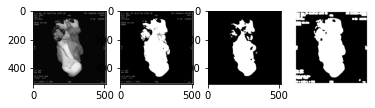

In [ ]:
fig,axes=plt.subplots(1,4)

axes[0].imshow(im,cmap='gray')
axes[1].imshow(im_bone,cmap='gray')
axes[2].imshow(im_eros,cmap='gray')
axes[3].imshow(im_dia,cmap='gray')
plt.axis("off")
plt.show()

**Filters**

Smoothning : Reduce variability of neightbouring pixels.Suppreses noise by blurring the image.

Sharpening : exagaration of variability of pixels.

Convolution with filters:
Filter weight are also called as kernels

Smoothing can improve the signal-to-noise ratio of your image by blurring out small variations in intensity. The Gaussian filter is excellent for this: it is a circular (or spherical) smoothing kernel that weights nearby pixels higher than distant ones.

In [ ]:
im = np.array([[93, 36,  87], 
               [18, 49,  51],
               [45, 32,  63]])

im_filt_max = ndi.maximum_filter(im, size=3)
print(im_filt_max[1,1])

im_filt_uniform =ndi.uniform_filter(im, size=3)
print(im_filt_uniform[1,1])


im_filt_per=ndi.percentile_filter(im, 60, size=3)
print(im_filt_per[1,1])


im_filt_med=ndi.median_filter(im, size=3)
print(im_filt_med[1,1])

93
52
51
49


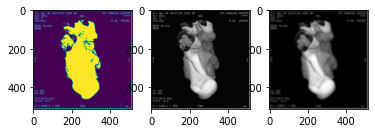

In [ ]:
im=imageio.imread("/content/MONO2-16-ankle_v1.dcm")
# Smooth "im" with Gaussian filters
im_s1 = ndi.gaussian_filter(im, sigma=1)
im_s3 = ndi.gaussian_filter(im,sigma=3)

# Draw bone masks of each image
fig, axes = plt.subplots(1,3)
axes[0].imshow(im >= 145)
axes[1].imshow(im_s1,cmap='gray')
axes[2].imshow(im_s3,cmap='gray')
plt.show()

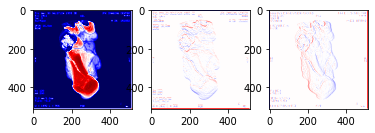

In [ ]:
#Sobel filters -adds extra weights to central pixel
#horizontal and verticle edge detector
im=imageio.imread("/content/MONO2-16-ankle_v1.dcm")
weights_h=[[1,2,1],
         [0,0,0],
         [-1,-2,-1]]

weights_v=[[1,0,-1],
         [2,0,-2],
         [1,0,-1]]
edges_v=ndi.convolve(im,weights=weights_v)           
edges_h=ndi.convolve(im,weights=weights_h)  
fig, axes = plt.subplots(1,3)
axes[0].imshow(im,cmap='seismic')
axes[1].imshow(edges_h,cmap='seismic')
axes[2].imshow(edges_v,cmap='seismic')
plt.show()    

Combine horizontal and verticle edge data by calculating distance

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


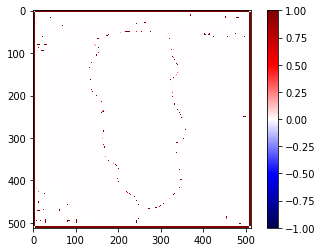

In [ ]:
edges=np.sqrt(np.square(edges_v)+np.square(edges_h))
plt.imshow(edges,cmap='seismic',vmin=-1,vmax=1)
plt.colorbar()
plt.show()